In [1]:
from src.util import ddb_util, LOGGER, date_util, agg_util
import logging
from tqdm import tqdm
import pickle
import math
import zipfile
import datetime
import agg_recalc
LOGGER.setLevel(logging.CRITICAL)

In [2]:
profile_name = 'cnprod'
n_threads = 6
ddb = ddb_util.LambdaDDB(profile_name=profile_name)
capacity = 1000000

In [3]:
ss = ddb.scan(table_name='students')

In [4]:
import matplotlib.pyplot as plt

In [5]:
ss[0]['aggregates']['all_time'].keys()

['ac', 'd', 'as', 'p', 'add', 'ad']

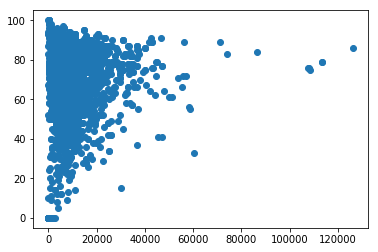

In [7]:
x = [s['aggregates']['all_time']['d'] for s in ss]
y = [s['aggregates']['all_time']['as'] for s in ss]
plt.scatter(x, y)
plt.show()

In [3]:
#data = agg_recalc.scan_data(ddb, capacity)
with open('dev_data.pkl', 'rb') as f:
    data = pickle.load(f)

In [75]:
with open('dev_data.pkl', 'wb') as f:
    pickle.dump(data, f)

In [4]:
date_experiences = agg_recalc.group_experiences_by_date(data['experience'])

Experience:  35%|███▌      | 68616/194196 [00:00<00:00, 686154.11it/s]

Converting dates on experience records...


Date:   2%|▏         | 2/98 [00:00<00:04, 19.83it/s]

Grouping experience by date...


Date: 100%|██████████| 98/98 [00:04<00:00, 22.06it/s]


In [5]:
date_hourly_stats = agg_recalc.convert_to_hourly_stats(date_experiences)

Date:   8%|▊         | 8/98 [00:00<00:01, 60.08it/s]

Converting experience records to hourly-stats...


Date: 100%|██████████| 98/98 [00:04<00:00, 22.82it/s]


In [14]:
agg_recalc.reset_aggs(
    data, ddb, profile_name, capacity, n_threads)

Table:   0%|          | 0/5 [00:00<?, ?it/s]

Resetting all aggregates...



Table: 100%|██████████| 5/5 [00:36<00:00,  7.63s/it]


Deleting existing hourly stats...


KeyboardInterrupt: 

In [ ]:
agg_recalc.calc_aggs(date_hourly_stats, capacity, profile_name, ddb, n_threads)